In [1]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import json
import os
import numpy as np
import pickle
from IPython.display import display

In [2]:
cd ~/dev/milsed/models/

/home/js7561/dev/milsed/models


In [3]:
version = '190cd92.0'

In [4]:
OUTPUT_PATH = 'resources'
resultsfolder = os.path.join(OUTPUT_PATH, version)

In [5]:
# Visualize training
history_file = os.path.join(resultsfolder, 'history.pkl')
with open(history_file, 'rb') as fp:
    history = pickle.load(fp)

In [6]:
history.keys()

dict_keys(['lr', 'val_loss', 'static/tags_acc', 'val_static/tags_acc', 'static/tags_loss', 'val_static/tags_loss', 'loss'])

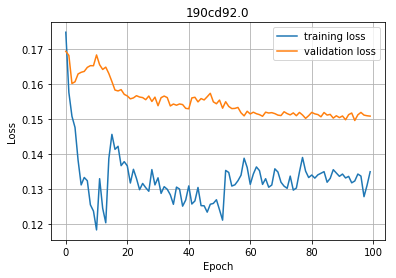

In [7]:
plt.plot(history['loss'], label='training loss')
plt.plot(history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title(version)
plt.grid()
plt.legend()
plt.show()

In [8]:
resultsfile = os.path.join(OUTPUT_PATH, version, 'results.json')
with open(resultsfile, 'r') as fp:
    results = json.load(fp)

In [9]:
results['weak']['micro']

{'f1': 0.2325056433408578,
 'precision': 0.3678571428571429,
 'recall': 0.16996699669966997}

In [36]:
def report_results(version):
    
    # Load results
    resultsfolder = os.path.join(OUTPUT_PATH, version)
    resultsfile = os.path.join(OUTPUT_PATH, version, 'results.json')
    with open(resultsfile, 'r') as fp:
        results = json.load(fp)
        
    # report
    print('{:<10}{}'.format('Model', version))
    print('\nWeak:')
    for metric in results['weak']['micro'].keys():
        print('{:<10}{:.3f}'.format(metric, results['weak']['micro'][metric]))
        
    print('\nStrong:')
    strong_f = results['strong']['overall']['f_measure']
    strong_e = results['strong']['overall']['error_rate'] 
    print('{:<10}{:.3f}'.format('precision', strong_f['precision']))
    print('{:<10}{:.3f}'.format('recall', strong_f['recall']))
    print('{:<10}{:.3f}'.format('f1', strong_f['f_measure']))
    print('{:<10}{:.3f}'.format('e_rate', strong_e['error_rate']))
    
    print('\n{:<40}P\tR\tF\tE'.format('Strong per-class:'))
    strong_c = results['strong']['class_wise']
    for c in strong_c.keys():
        r_c = strong_c[c]['f_measure']
        r_ce = strong_c[c]['error_rate']
        print('{:<40}{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}'.format(c, r_c['precision'], r_c['recall'], 
                                                         r_c['f_measure'], r_ce['error_rate']))
    
    # Load training history
    history_file = os.path.join(resultsfolder, 'history.pkl')
    with open(history_file, 'rb') as fp:
        history = pickle.load(fp)
        
    # Visualize training history
    plt.plot(history['loss'], label='training loss')
    plt.plot(history['val_loss'], label='validation loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(version)
    plt.grid()
    plt.legend()
    plt.show()

Model     190cd92.0

Weak:
precision 0.368
recall    0.170
f1        0.233

Strong:
precision 0.208
recall    0.304
f1        0.247
e_rate    1.348

Strong per-class:                       P	R	F	E
Ambulance (siren)                       0.283	0.096	0.143	1.148
Civil defense siren                     0.618	0.679	0.647	0.741
Air horn, truck horn                    0.434	0.120	0.188	1.036
Police car (siren)                      0.226	0.469	0.305	2.137
Car passing by                          0.183	0.044	0.071	1.151
Fire engine, fire truck (siren)         0.294	0.498	0.370	1.698
Bicycle                                 0.079	0.112	0.092	2.199
Skateboard                              0.395	0.665	0.495	1.355
Screaming                               0.346	0.269	0.303	1.239
Truck                                   0.198	0.245	0.219	1.751
Reversing beeps                         1.000	0.006	0.011	0.994
Train                                   0.272	0.155	0.198	1.260
Car alarm                          

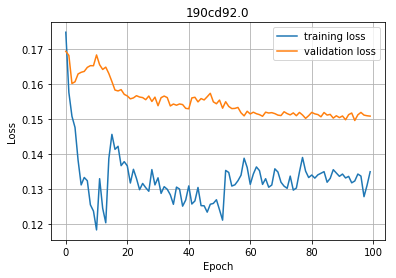

In [37]:
report_results('190cd92.0')

In [38]:
def compare_results(versions):
    
    results = {}
    
    # Load results
    for version in versions:
        # Load results
        resultsfolder = os.path.join(OUTPUT_PATH, version)
        resultsfile = os.path.join(OUTPUT_PATH, version, 'results.json')
        with open(resultsfile, 'r') as fp:
            results[version] = json.load(fp)
    
    # Convert to dataframe
    df = pd.DataFrame(columns=['Model', 'w_f1', 'w_p', 'w_r', 's_f1', 's_p', 's_r', 's_e'])
    for k in results.keys():
        r = results[k]
        weak = r['weak']['micro']
        strong_f = r['strong']['overall']['f_measure']
        strong_e = r['strong']['overall']['error_rate']
        data = (k, weak['f1'], weak['precision'], weak['recall'], strong_f['f_measure'], 
                      strong_f['precision'], strong_f['recall'], strong_e['error_rate'])
        df.loc[len(df), :] = data
        
    display(df.sort_values('Model'))
    return df

In [39]:
versions = ['190cd92.0', '190cd92.1', '190cd92.2', '190cd92.3', '190cd92.4', '190cd92.5']
df = compare_results(versions)

,Model,w_f1,w_p,w_r,s_f1,s_p,s_r,s_e
5,190cd92.0,0.232506,0.367857,0.169967,0.247321,0.208288,0.304358,1.34794
0,190cd92.1,0.163265,0.26087,0.118812,0.071561,0.186654,0.0442661,1.00275
1,190cd92.2,0.21764,0.355805,0.156766,0.219263,0.172691,0.300229,1.58303
3,190cd92.3,0.147685,0.305699,0.0973597,0.186294,0.136485,0.293349,1.98647
2,190cd92.4,0.158343,0.302326,0.107261,0.0716846,0.271903,0.0412844,0.984862
4,190cd92.5,0.153459,0.322751,0.10066,0.186791,0.119865,0.422936,3.15298


In [40]:
df.sort_values('Model')

,Model,w_f1,w_p,w_r,s_f1,s_p,s_r,s_e
5,190cd92.0,0.232506,0.367857,0.169967,0.247321,0.208288,0.304358,1.34794
0,190cd92.1,0.163265,0.26087,0.118812,0.071561,0.186654,0.0442661,1.00275
1,190cd92.2,0.21764,0.355805,0.156766,0.219263,0.172691,0.300229,1.58303
3,190cd92.3,0.147685,0.305699,0.0973597,0.186294,0.136485,0.293349,1.98647
2,190cd92.4,0.158343,0.302326,0.107261,0.0716846,0.271903,0.0412844,0.984862
4,190cd92.5,0.153459,0.322751,0.10066,0.186791,0.119865,0.422936,3.15298


In [23]:
results['strong']['class_wise'].keys()

dict_keys(['Ambulance (siren)', 'Civil defense siren', 'Air horn, truck horn', 'Police car (siren)', 'Car passing by', 'Fire engine, fire truck (siren)', 'Bicycle', 'Skateboard', 'Screaming', 'Truck', 'Reversing beeps', 'Train', 'Car alarm', 'Bus', 'Car', 'Train horn', 'Motorcycle'])

In [25]:
results['strong']['class_wise']['Car']['f_measure']

{'f_measure': 0.18676774638180565,
 'precision': 0.10711462450592886,
 'recall': 0.728494623655914}